## Задание 1

### 1) В среде Google Colab создали новый блокнот (notebook). Импортировали необходимые для работы библиотеки и модули.

In [40]:
# импорт модулей
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab3')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### 2) Загрузили набор данных MNIST, содержащий размеченные изображения рукописных цифр.  

In [41]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 3) Разбили набор данных на обучающие и тестовые данные в соотношении 60 000:10 000 элементов. Параметр random_state выбрали равным (4k – 1)=23, где k=6 –номер бригады. Вывели размерности полученных обучающих и тестовых массивов данных.

In [42]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 23)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


### 4) Провели предобработку данных: привели обучающие и тестовые данные к формату, пригодному для обучения сверточной нейронной сети. Входные данные принимают значения от 0 до 1, метки цифр закодированы по принципу «one-hot encoding». Вывели размерности предобработанных обучающих и тестовых массивов данных.

In [39]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3, 1, 1, 1, 1)
Shape of transformed X test: (10000, 32, 32, 3, 1, 1, 1, 1)
Shape of transformed y train: (50000, 10, 10, 10, 10)
Shape of transformed y test: (10000, 10, 10, 10, 10)


### 5) Реализовали модель сверточной нейронной сети и обучили ее на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывели информацию об архитектуре нейронной сети.

In [6]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# компилируем и обучаем модель
batch_size = 512
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9800 - loss: 0.0627 - val_accuracy: 0.9838 - val_loss: 0.0546
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9814 - loss: 0.0590 - val_accuracy: 0.9840 - val_loss: 0.0505
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9839 - loss: 0.0532 - val_accuracy: 0.9845 - val_loss: 0.0486
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9839 - loss: 0.0511 - val_accuracy: 0.9845 - val_loss: 0.0466
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9857 - val_loss: 0.0464
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9865 - val_loss: 0.0443
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9872 - loss: 0.0434 - val_accuracy: 0.9855 - val_loss: 0.0455
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accura

### 6) Оценили качество обучения на тестовых данных. Вывели значение функции ошибки и значение метрики качества классификации на тестовых данных.

In [9]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0257
Loss on test data: 0.02905484288930893
Accuracy on test data: 0.9904999732971191


### 7) Подали на вход обученной модели два тестовых изображения. Вывели изображения, истинные метки и результаты распознавания.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
NN output: [[6.8512822e-09 1.5158575e-15 1.0000000e+00 9.0422042e-10 5.9816353e-12
  5.8040170e-12 1.7400075e-13 1.9021928e-11 4.2980776e-08 6.8364819e-12]]


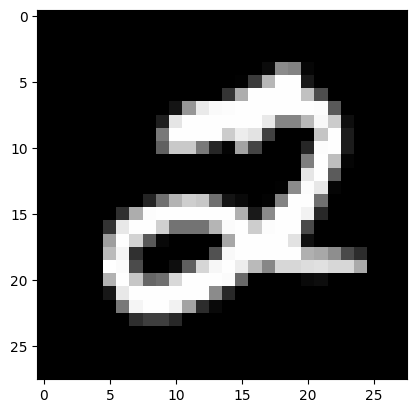

Real mark:  2
NN answer:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
NN output: [[7.5003503e-11 1.8689699e-14 1.8644093e-10 2.7299168e-06 3.8650401e-06
  7.5222495e-09 4.5316078e-13 3.9882584e-06 6.8186014e-06 9.9998260e-01]]


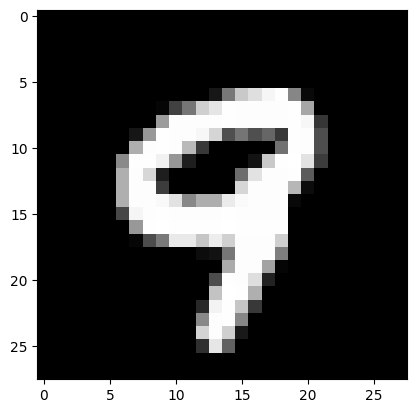

Real mark:  9
NN answer:  9


In [15]:
# вывод двух тестовых изображений и результатов распознавания

for n in [3,26]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

### 8) Вывели отчет о качестве классификации тестовой выборки и матрицу ошибок для тестовой выборки.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       997
           1       1.00      1.00      1.00      1164
           2       0.99      0.98      0.99      1030
           3       1.00      0.99      0.99      1031
           4       0.99      1.00      0.99       967
           5       0.98      1.00      0.99       860
           6       0.99      1.00      1.00       977
           7       0.99      0.99      0.99      1072
           8       0.99      0.98      0.99       939
           9       0.99      0.98      0.99       963

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



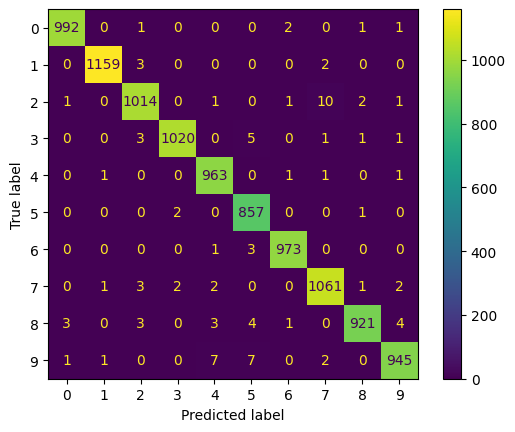

In [16]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

### 9) Загрузили, предобработали и подали на вход обученной нейронной сети собственное изображение, созданное при выполнении лабораторной работы №1. Вывели изображение и результат распознавания.

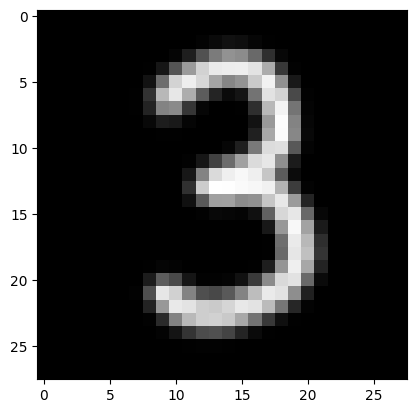

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
I think it's 3


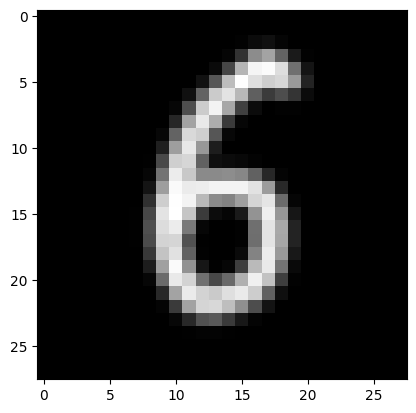

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
I think it's 6


In [18]:
# загрузка собственного изображения
from PIL import Image

for name_image in ['цифра 3.png', 'цифра 6.png']:
  file_data = Image.open(name_image)
  file_data = file_data.convert('L') # перевод в градации серого
  test_img = np.array(file_data)

  # вывод собственного изображения
  plt.imshow(test_img, cmap=plt.get_cmap('gray'))
  plt.show()

  # предобработка
  test_img = test_img / 255
  test_img = np.reshape(test_img, (1,28,28,1))

  # распознавание
  result = model.predict(test_img)
  print('I think it\'s', np.argmax(result))

### 10) Загрузили с диска модель, сохраненную при выполнении лабораторной работы №1. Вывели информацию об архитектуре модели. Повторили для этой модели п. 6.

In [22]:
model_lr1 = keras.models.load_model("model_1h100_2h50.keras")

model_lr1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,062 (328.37 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [24]:
# развернем каждое изображение 28*28 в вектор 784
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 23)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X train:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 784)
Shape of transformed X train: (10000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [25]:
# Оценка качества работы модели на тестовых данных
scores = model_lr1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9453 - loss: 0.1872
Loss on test data: 0.19880765676498413
Accuracy on test data: 0.9416000247001648


### 11) Сравнили обученную модель сверточной сети и наилучшую модель полносвязной сети из лабораторной работы №1 по следующим показателям:
### - количество настраиваемых параметров в сети
### - количество эпох обучения
### - качество классификации тестовой выборки.
### Сделали выводы по результатам применения сверточной нейронной сети для распознавания изображений.  

Таблица1:

| Модель   | Количество настраиваемых параметров | Количество эпох обучения | Качество классификации тестовой выборки |
|----------|-------------------------------------|---------------------------|-----------------------------------------|
| Сверточная | 34 826                              | 15                        | accuracy:0.990     ; loss:0.029                                   |
| Полносвязная | 84 062                              | 50                        | accuracy:0.942     ; loss:0.198                                  |


По результатам применения сверточной НС, а также по результатам таблицы 1 делаем выводы, что сверточная НС намного лучше справляется с задачами распознования изображений, чем полносвязная - имеет меньше настраиваемых параметров, быстрее обучается, имеет лучшие показатели качества.

## Задание 2

### В новом блокноте выполнили п. 2–8 задания 1, изменив набор данных MNIST на CIFAR-10, содержащий размеченные цветные изображения объектов, разделенные на 10 классов.  
### При этом:
### - в п. 3 разбиение данных на обучающие и тестовые произвели в соотношении 50 000:10 000
### - после разбиения данных (между п. 3 и 4) вывели 25 изображений из обучающей выборки с подписями классов
### - в п. 7 одно из тестовых изображений должно распознаваться корректно, а другое – ошибочно.   

### 1) Загрузили набор данных CIFAR-10, содержащий цветные изображения размеченные на 10 классов: самолет, автомобиль, птица, кошка, олень, собака, лягушка, лошадь, корабль, грузовик.

In [61]:
# загрузка датасета
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 2) Разбили набор данных на обучающие и тестовые данные в соотношении 50 000:10 000 элементов. Параметр random_state выбрали равным (4k – 1)=23, где k=6 –номер бригады. Вывели размерности полученных обучающих и тестовых массивов данных.

In [62]:
# создание своего разбиения датасета

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 50000,
                                                    random_state = 23)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


### Вывели 25 изображений из обучающей выборки с подписью классов.

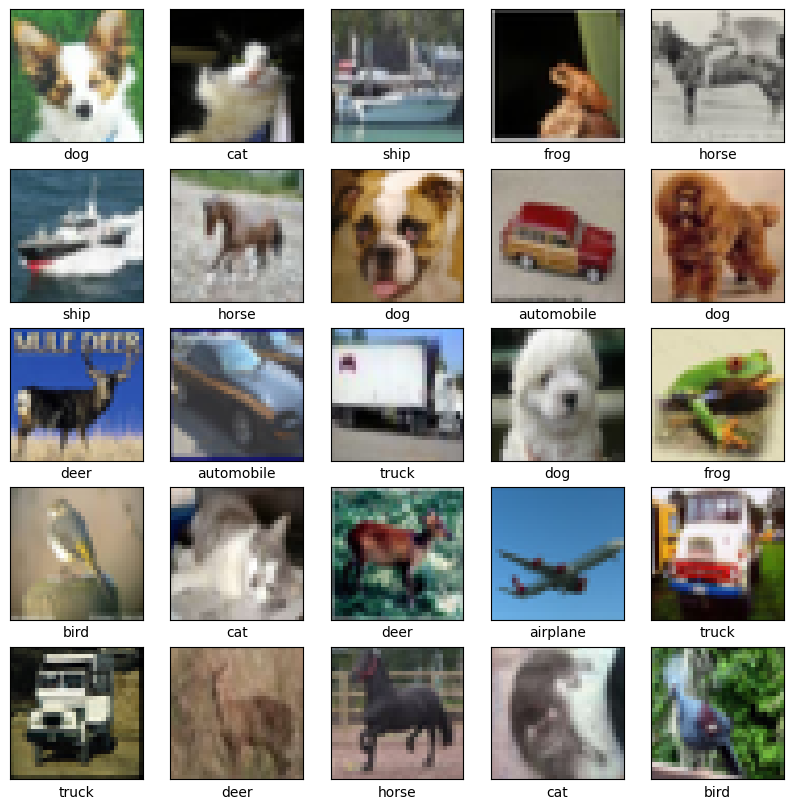

In [63]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### 3) Провели предобработку данных: привели обучающие и тестовые данные к формату, пригодному для обучения сверточной нейронной сети. Входные данные принимают значения от 0 до 1, метки цифр закодированы по принципу «one-hot encoding». Вывели размерности предобработанных обучающих и тестовых массивов данных.

In [64]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (32, 32, 3)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3)
Shape of transformed X test: (10000, 32, 32, 3)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


### 4) Реализовали модель сверточной нейронной сети и обучили ее на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывели информацию об архитектуре нейронной сети.

In [77]:
# создаем модель
model = Sequential()

# Блок 1
model.add(layers.Conv2D(32, (3, 3), padding="same",
                        activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 2
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 3
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))


model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [78]:
# компилируем и обучаем модель
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.2561 - loss: 2.1138 - val_accuracy: 0.3748 - val_loss: 1.7757
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4652 - loss: 1.4737 - val_accuracy: 0.5676 - val_loss: 1.2540
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5844 - loss: 1.1821 - val_accuracy: 0.6148 - val_loss: 1.1905
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6486 - loss: 1.0157 - val_accuracy: 0.6302 - val_loss: 1.0861
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6782 - loss: 0.9326 - val_accuracy: 0.7200 - val_loss: 0.8344
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7147 - loss: 0.8370 - val_accuracy: 0.7302 - val_loss: 0.7885
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7334 - loss: 0.8017 - val_accuracy: 0.7486 - val_loss: 0.7221
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7546 - loss: 0.7279 - val_accur

### 5) Оценили качество обучения на тестовых данных. Вывели значение функции ошибки и значение метрики качества классификации на тестовых данных.

In [79]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8507 - loss: 0.5097
Loss on test data: 0.4886781871318817
Accuracy on test data: 0.8521999716758728


### 6) Подали на вход обученной модели два тестовых изображения. Вывели изображения, истинные метки и результаты распознавания.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
NN output: [[9.99798894e-01 2.48007268e-08 8.06010303e-06 1.16862842e-09
  4.74675188e-10 1.10334505e-10 8.96490215e-10 5.45068835e-09
  1.92513107e-04 4.99970611e-07]]


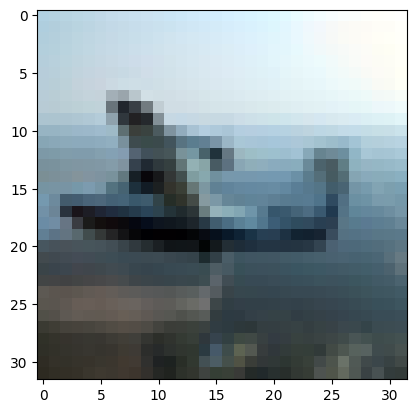

Real mark:  0
NN answer:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
NN output: [[0.15776254 0.00173936 0.4906533  0.03821344 0.08128565 0.02635591
  0.00488075 0.19360931 0.00255206 0.00294772]]


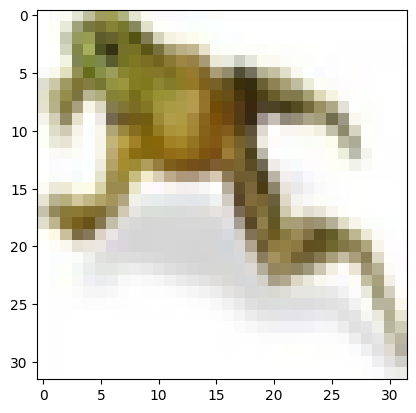

Real mark:  6
NN answer:  2


In [89]:
# вывод двух тестовых изображений и результатов распознавания

for n in [3,15]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(32,32,3), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

### 7) Вывели отчет о качестве классификации тестовой выборки и матрицу ошибок для тестовой выборки.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

    airplane       0.86      0.86      0.86       986
  automobile       0.97      0.90      0.93       971
        bird       0.85      0.76      0.80      1043
         cat       0.72      0.74      0.73      1037
        deer       0.84      0.84      0.84       969
         dog       0.74      0.79      0.77       979
        frog       0.88      0.88      0.88      1025
       horse       0.86      0.89      0.88       948
        ship       0.92      0.93      0.93      1003
       truck       0.89      0.93      0.91      1039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



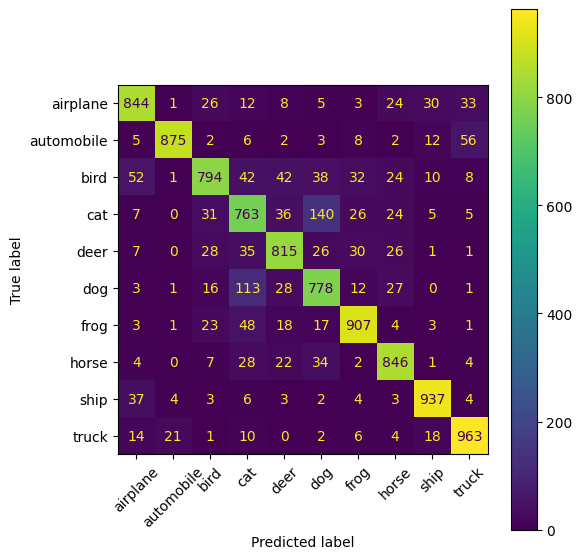

In [95]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names=class_names))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=45)  # поворот подписей по X и приятная палитра
plt.tight_layout()  # чтобы всё влезло
plt.show()

По результатам классификации датасета CIFAR-10 созданной сверточной моделью можно сделать вывод, что она довольно неплохо справилась с задачей. Полученные метрики оценки качества имеют показатели в районе 0.85.